In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


# TABLE DESCRIPTION

In [175]:
description = pd.read_csv('D:\data prep\project data\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('bureau')].drop(columns = 'Table',axis = 0).set_index("Row")
description

,Description,Special
Row,,
SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
DAYS_CREDIT,How many days before current application did c...,time only relative to the application
CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN


# CHECK NULL

In [176]:
number_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'number_missing' : number_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
SK_ID_BUREAU,SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE,89098,6.080426
DAYS_ENDDATE_FACT,DAYS_ENDDATE_FACT,544673,37.170798
AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_MAX_OVERDUE,948545,64.732738
CNT_CREDIT_PROLONG,CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,AMT_CREDIT_SUM,3,0.000205


In [177]:
columns = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
columns

Index([], dtype='object')

### I didn't find any column with >90%null. So removing is not necessary

# CHECK OUTLIERS

<Axes: ylabel='SK_ID_BUREAU'>

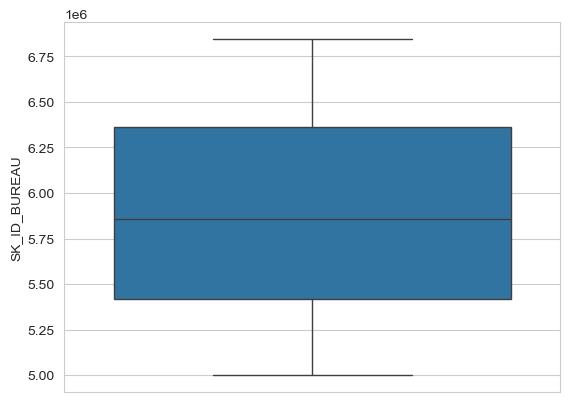

In [178]:
sns.boxplot(df['SK_ID_BUREAU'])

<Axes: ylabel='CREDIT_ACTIVE'>

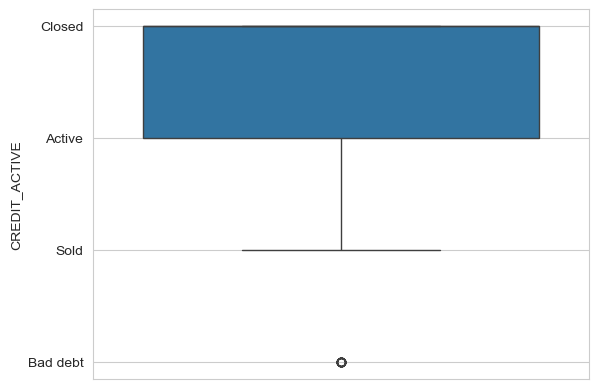

In [179]:
sns.boxplot(df['CREDIT_ACTIVE'])

<Axes: ylabel='CREDIT_CURRENCY'>

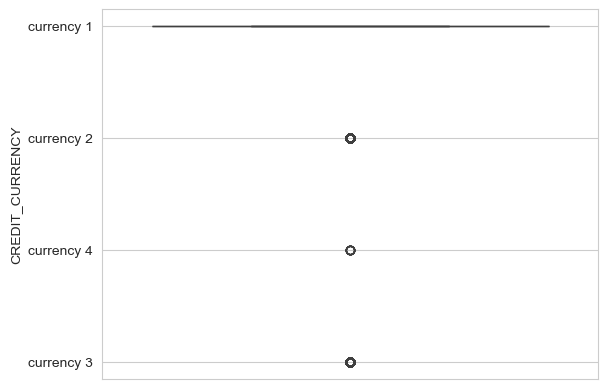

In [180]:
sns.boxplot(df['CREDIT_CURRENCY'])

<Axes: ylabel='DAYS_CREDIT'>

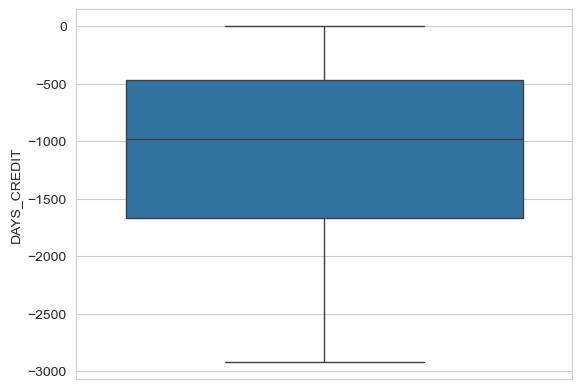

In [181]:
sns.boxplot(df['DAYS_CREDIT'])

<Axes: ylabel='CREDIT_DAY_OVERDUE'>

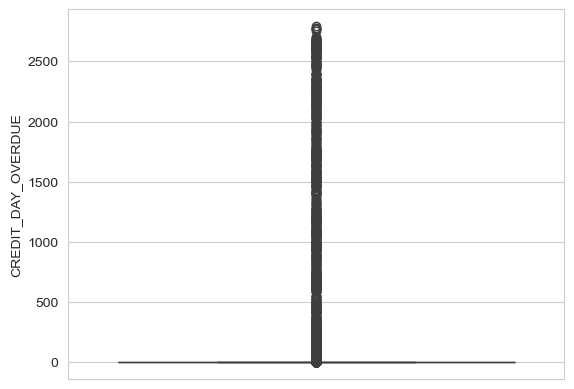

In [182]:
sns.boxplot(df['CREDIT_DAY_OVERDUE'])

<Axes: ylabel='DAYS_CREDIT_ENDDATE'>

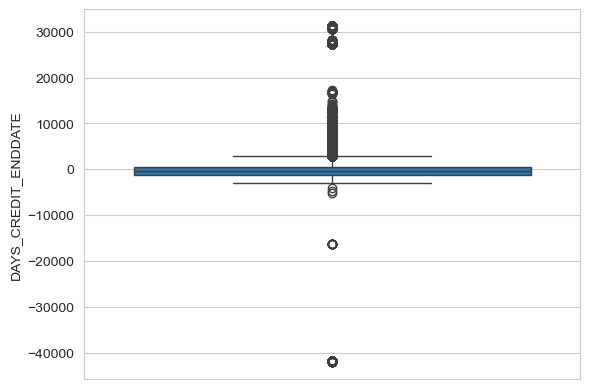

In [183]:
sns.boxplot(df['DAYS_CREDIT_ENDDATE'])

<Axes: ylabel='DAYS_ENDDATE_FACT'>

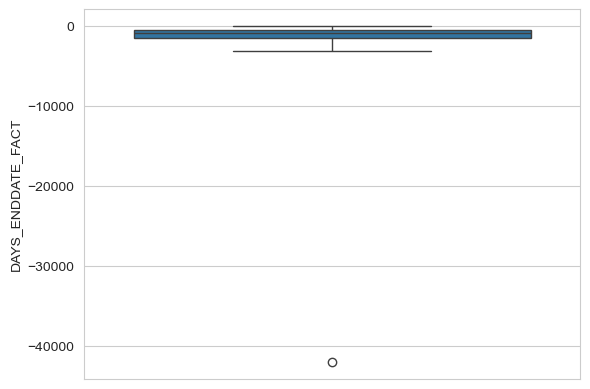

In [184]:
sns.boxplot(df['DAYS_ENDDATE_FACT'])

<Axes: ylabel='AMT_CREDIT_MAX_OVERDUE'>

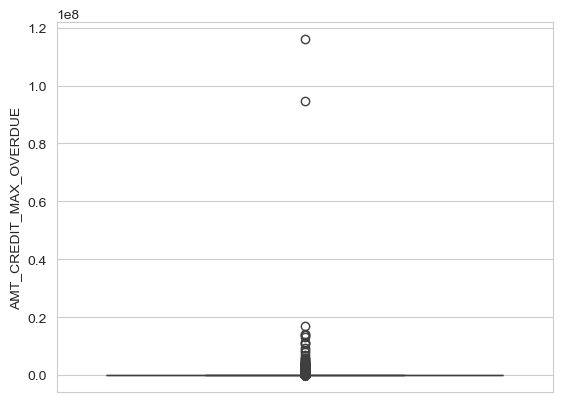

In [185]:
sns.boxplot(df['AMT_CREDIT_MAX_OVERDUE'])

<Axes: ylabel='CNT_CREDIT_PROLONG'>

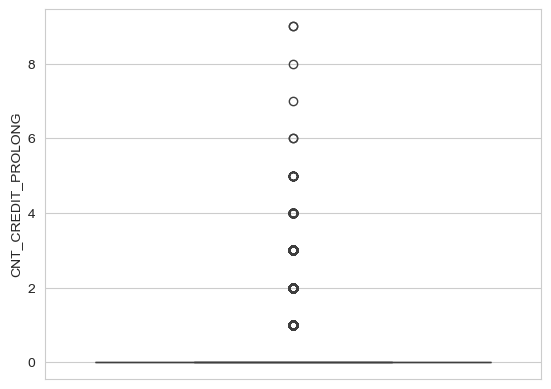

In [186]:
sns.boxplot(df['CNT_CREDIT_PROLONG'])

<Axes: ylabel='AMT_CREDIT_SUM'>

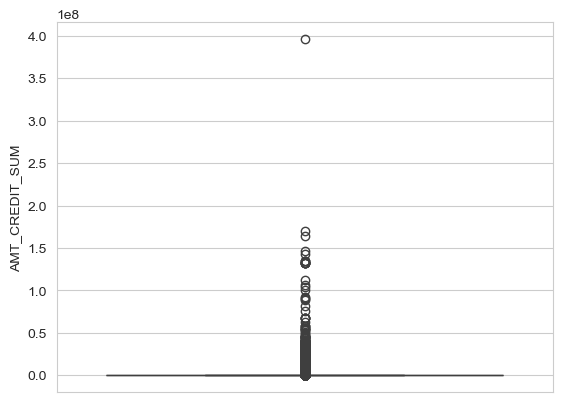

In [187]:
sns.boxplot(df['AMT_CREDIT_SUM'])

<Axes: ylabel='AMT_CREDIT_SUM_DEBT'>

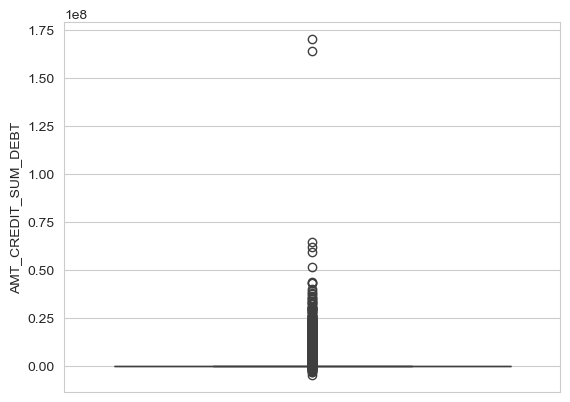

In [188]:
sns.boxplot(df['AMT_CREDIT_SUM_DEBT'])

<Axes: ylabel='AMT_CREDIT_SUM_LIMIT'>

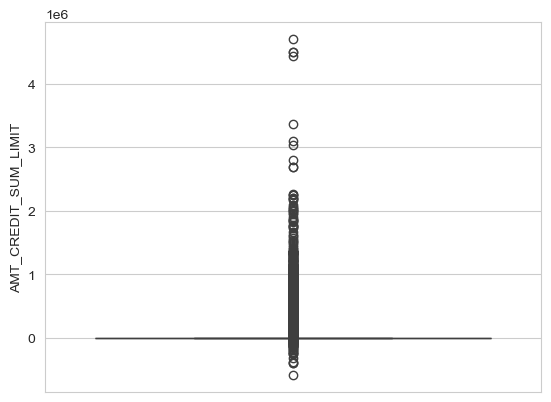

In [189]:
sns.boxplot(df['AMT_CREDIT_SUM_LIMIT'])

<Axes: ylabel='AMT_CREDIT_SUM_OVERDUE'>

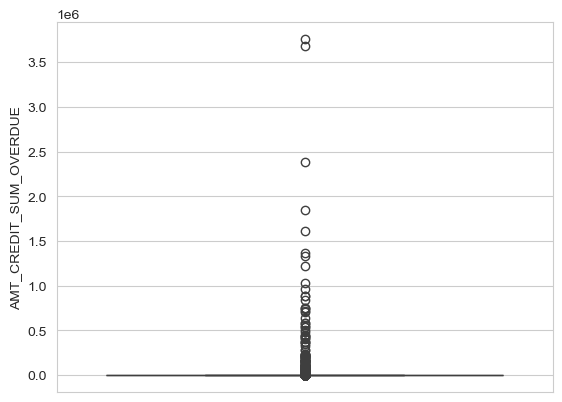

In [190]:
sns.boxplot(df['AMT_CREDIT_SUM_OVERDUE'])

<Axes: ylabel='CREDIT_TYPE'>

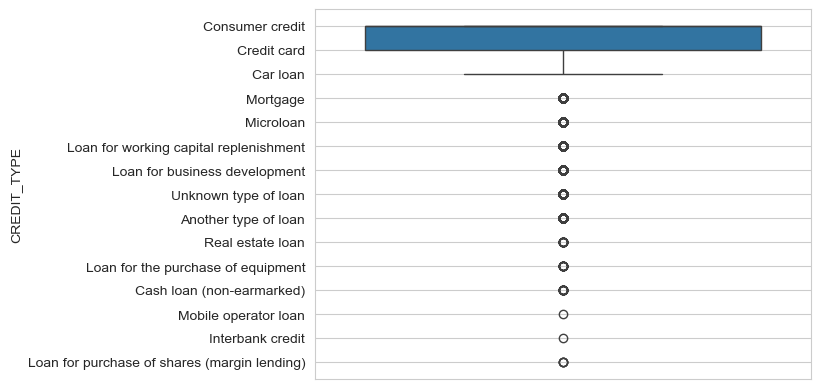

In [191]:
sns.boxplot(df['CREDIT_TYPE'])

<Axes: ylabel='DAYS_CREDIT_UPDATE'>

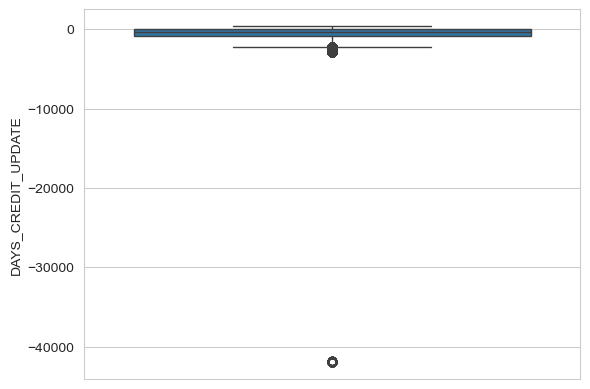

In [192]:
sns.boxplot(df['DAYS_CREDIT_UPDATE'])

<Axes: ylabel='AMT_ANNUITY'>

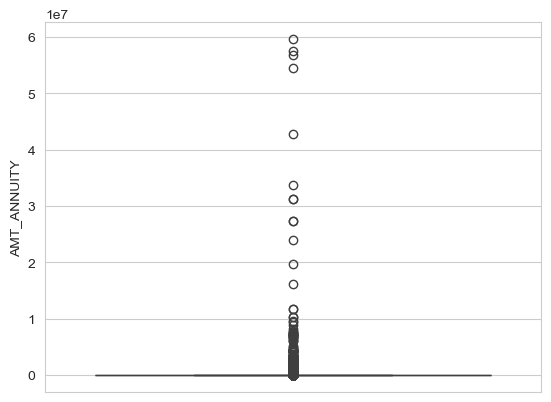

In [193]:
sns.boxplot(df['AMT_ANNUITY'])

# CHECK VALID

In [194]:
numerical_data = df._get_numeric_data()

In [195]:
for column in numerical_data.columns:
    great0 = df[column][df[column] > 0].count()
    equal0 =  df[column][df[column] == 0].count()
    small0 = df[column][df[column] < 0].count()
    nan_total = df[column].isnull().sum()
    other_value = df.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{column} has  >0: {great0}, =0: {equal0}, <0: {small0}, nan: {nan_total}, other values: {other_value}')

SK_ID_BUREAU has  >0: 1465325, =0: 0, <0: 0, nan: 0, other values: 0
DAYS_CREDIT has  >0: 0, =0: 4, <0: 1465321, nan: 0, other values: 0
CREDIT_DAY_OVERDUE has  >0: 3706, =0: 1461619, <0: 0, nan: 0, other values: 0
DAYS_CREDIT_ENDDATE has  >0: 513371, =0: 746, <0: 862110, nan: 89098, other values: 0
DAYS_ENDDATE_FACT has  >0: 0, =0: 62, <0: 920590, nan: 544673, other values: 0
AMT_CREDIT_MAX_OVERDUE has  >0: 107137, =0: 409643, <0: 0, nan: 948545, other values: 0
CNT_CREDIT_PROLONG has  >0: 8820, =0: 1456505, <0: 0, nan: 0, other values: 0
AMT_CREDIT_SUM has  >0: 1409394, =0: 55928, <0: 0, nan: 3, other values: 0
AMT_CREDIT_SUM_DEBT has  >0: 369163, =0: 864650, <0: 8418, nan: 223094, other values: 0
AMT_CREDIT_SUM_LIMIT has  >0: 64880, =0: 910424, <0: 351, nan: 489670, other values: 0
AMT_CREDIT_SUM_OVERDUE has  >0: 3644, =0: 1461681, <0: 0, nan: 0, other values: 0
DAYS_CREDIT_UPDATE has  >0: 17, =0: 484, <0: 1464824, nan: 0, other values: 0
AMT_ANNUITY has  >0: 168026, =0: 167286, <0:

In [196]:
categorical_data = df.drop(columns=numerical_data.columns)

In [197]:
for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f'col {column} : {list(unique_values)}\n')

col CREDIT_ACTIVE : ['Closed', 'Active', 'Sold', 'Bad debt']

col CREDIT_CURRENCY : ['currency 1', 'currency 2', 'currency 4', 'currency 3']

col CREDIT_TYPE : ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan', 'Loan for working capital replenishment', 'Loan for business development', 'Unknown type of loan', 'Another type of loan', 'Real estate loan', 'Loan for the purchase of equipment', 'Cash loan (non-earmarked)', 'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']



# CHECK DISTRIBUTION OF CATEGORICAL

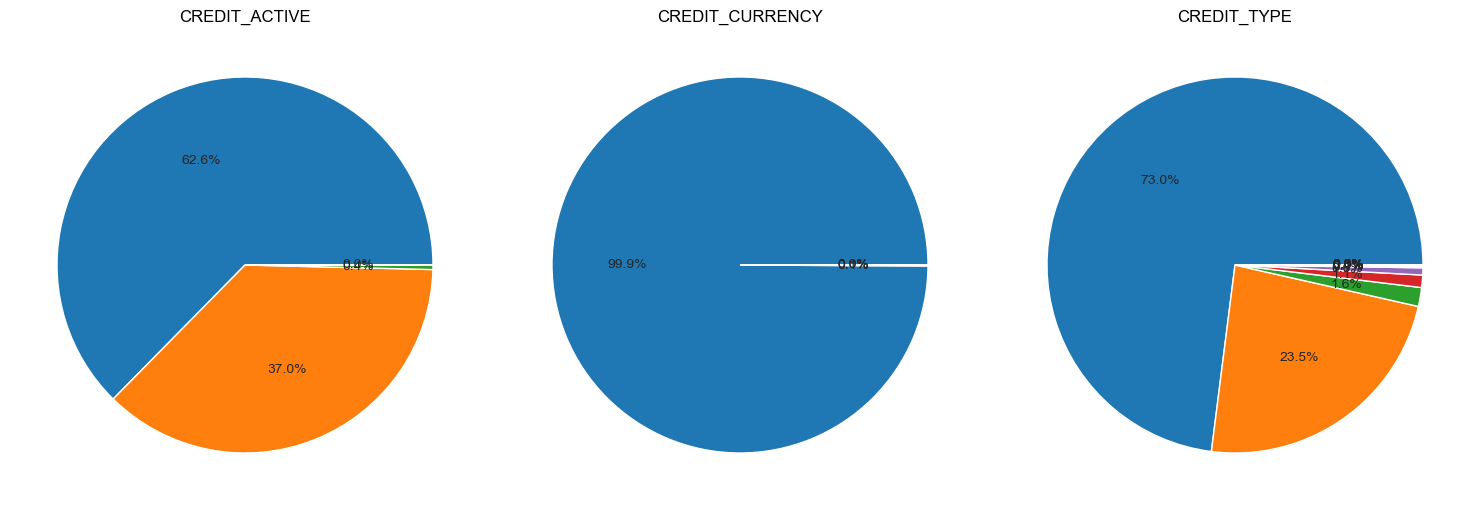

In [198]:
columns = categorical_data.columns

num_rows = 1
num_cols = len(columns)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5))

column_index = 0

for col in range(num_cols):
    sizes = categorical_data[columns[column_index]].value_counts(normalize=True)
    ax[col].pie(sizes, autopct='%1.1f%%')
    ax[col].set_title(columns[column_index], color='black')
    column_index += 1

plt.tight_layout()

plt.show()

In [199]:
for col in range(num_cols):
    column_name = columns[col]
    sizes = categorical_data[column_name].value_counts(normalize=True)
    
    print(f"\nInsights for {column_name}:")
    
    for category, percentage in sizes.iteritems():
        print(f"{category}: {percentage * 100:.2f}%")
    
    print(f"Total Unique Categories: {len(sizes)}")


Insights for CREDIT_ACTIVE:
Closed: 62.63%
Active: 36.98%
Sold: 0.39%
Bad debt: 0.00%
Total Unique Categories: 4

Insights for CREDIT_CURRENCY:
currency 1: 99.92%
currency 2: 0.07%
currency 3: 0.01%
currency 4: 0.00%
Total Unique Categories: 4

Insights for CREDIT_TYPE:
Consumer credit: 72.99%
Credit card: 23.47%
Car loan: 1.62%
Mortgage: 1.07%
Microloan: 0.61%
Loan for business development: 0.12%
Another type of loan: 0.06%
Unknown type of loan: 0.03%
Loan for working capital replenishment: 0.03%
Real estate loan: 0.00%
Cash loan (non-earmarked): 0.00%
Loan for the purchase of equipment: 0.00%
Loan for purchase of shares (margin lending): 0.00%
Mobile operator loan: 0.00%
Interbank credit: 0.00%
Total Unique Categories: 15


C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():


### Followed this chart, we can see that CREDIT_CURRENCY have signigicant difference between each value -> we can drop this column

# CREATE CORRELATION MATRIX

In [200]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
SK_ID_BUREAU,1.000000,0.014469,-0.001878,0.009412,0.017923,0.002837,0.002658,0.008040,0.006045,-0.003956,-0.000491,0.018640,0.002711,-0.003786
DAYS_CREDIT,0.014469,1.000000,-0.028343,0.231075,0.875291,-0.014414,-0.032111,0.055663,0.136678,0.024584,-0.000603,0.683189,0.000144,0.001774
CREDIT_DAY_OVERDUE,-0.001878,-0.028343,1.000000,-0.007540,-0.008780,0.001240,0.002809,-0.003627,-0.002552,-0.000310,0.095782,-0.018188,-0.000408,0.000059
DAYS_CREDIT_ENDDATE,0.009412,0.231075,-0.007540,1.000000,0.254893,0.000783,0.122179,0.060284,0.081933,0.088553,0.001136,0.247783,0.000200,0.000344
DAYS_ENDDATE_FACT,0.017923,0.875291,-0.008780,0.254893,1.000000,0.001590,0.013073,0.069940,0.024774,0.019586,-0.000363,0.745192,0.003171,0.002362
AMT_CREDIT_MAX_OVERDUE,0.002837,-0.014414,0.001240,0.000783,0.001590,1.000000,0.001483,0.085068,0.013129,0.000185,0.015068,-0.000620,0.001357,0.000246
CNT_CREDIT_PROLONG,0.002658,-0.032111,0.002809,0.122179,0.013073,0.001483,1.000000,-0.009257,-0.001271,0.076587,-0.000009,0.018988,-0.000663,0.000134
AMT_CREDIT_SUM,0.008040,0.055663,-0.003627,0.060284,0.069940,0.085068,-0.009257,1.000000,0.667766,0.003508,0.006779,0.111934,0.051585,-0.001292
AMT_CREDIT_SUM_DEBT,0.006045,0.136678,-0.002552,0.081933,0.024774,0.013129,-0.001271,0.667766,1.000000,-0.019174,0.007909,0.139080,0.016077,-0.000788
AMT_CREDIT_SUM_LIMIT,-0.003956,0.024584,-0.000310,0.088553,0.019586,0.000185,0.076587,0.003508,-0.019174,1.000000,-0.000711,0.041893,0.003674,0.000932


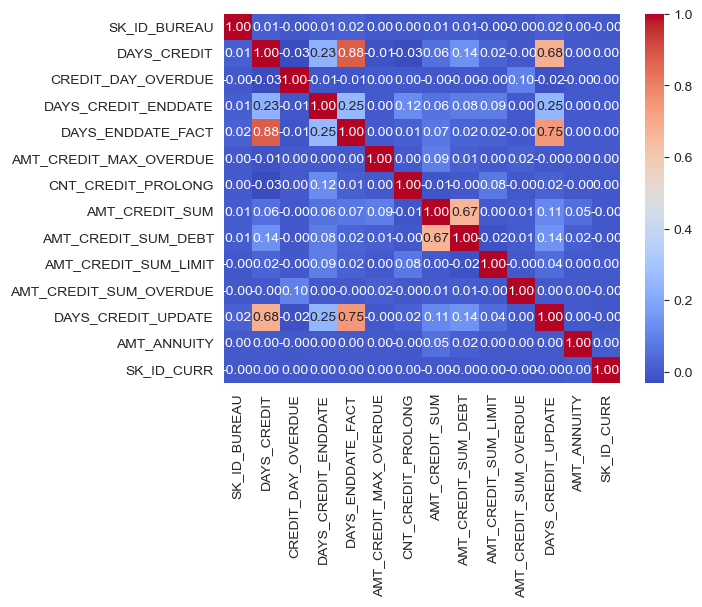

In [201]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [202]:
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Các cặp features có correlation cao nhất:\n", max_corr.head())

Các cặp features có correlation cao nhất:
 SK_ID_BUREAU       SK_ID_BUREAU           1.000000
DAYS_ENDDATE_FACT  DAYS_CREDIT            0.875291
                   DAYS_CREDIT_UPDATE     0.745192
DAYS_CREDIT        DAYS_CREDIT_UPDATE     0.683189
AMT_CREDIT_SUM     AMT_CREDIT_SUM_DEBT    0.667766
dtype: float64


DAYS_ENDDATE_FACT and DAYS_CREDIT, DAYS_CREDIT_UPDATE columns have high correlation -> two of them can be dropped

# DROP AND ADD COLUMNS

In [203]:
new_df = df.drop(columns=['CREDIT_CURRENCY','DAYS_ENDDATE_FACT','DAYS_CREDIT_UPDATE'])
# Thêm cột mới AMT_CREDIT_SUM_DEBT_RATIO để rút ra được tỉ lệ giữa nợ hiện tại và tổng số tiền tín dụng
# thể hiện gánh nặng tài chính đối với người đề nghị vay.
new_df['AMT_CREDIT_SUM_DEBT_RATIO'] = new_df['AMT_CREDIT_SUM_DEBT'] / new_df['AMT_CREDIT_SUM']

new_df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_CREDIT_SUM_DEBT_RATIO
0,5714462,Closed,-497,0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629,0.00000
1,5714463,Active,-208,0,1075.0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629,0.76152
2,5714464,Active,-203,0,528.0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN
3,5714465,Active,-203,0,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629,NaN
4,5714466,Active,-629,0,1197.0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN


# MERGE WITH TARGET TABLE

In [204]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df2 = df2[['SK_ID_CURR','TARGET']]
df2.head()

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,64140,0
4,219374,0


In [205]:
merge_table = pd.merge(new_df, df2, on='SK_ID_CURR', how='left')
merge_table.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_CREDIT_SUM_DEBT_RATIO,TARGET
0,5714462,Closed,-497,0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629,0.00000,0.0
1,5714463,Active,-208,0,1075.0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629,0.76152,0.0
2,5714464,Active,-203,0,528.0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN,0.0
3,5714465,Active,-203,0,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629,NaN,0.0
4,5714466,Active,-629,0,1197.0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN,0.0


# CHECK DISTRIBUTION OF NUMERICAL

### Number of past loans per customer

In [206]:
num_past_loan_target = merge_table[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0.0,1
1,1,1.0,1
2,2,0.0,6
3,3,0.0,7
4,4,0.0,6
...,...,...,...
210804,307501,0.0,5
210805,307504,0.0,4
210806,307505,0.0,2
210807,307506,0.0,4


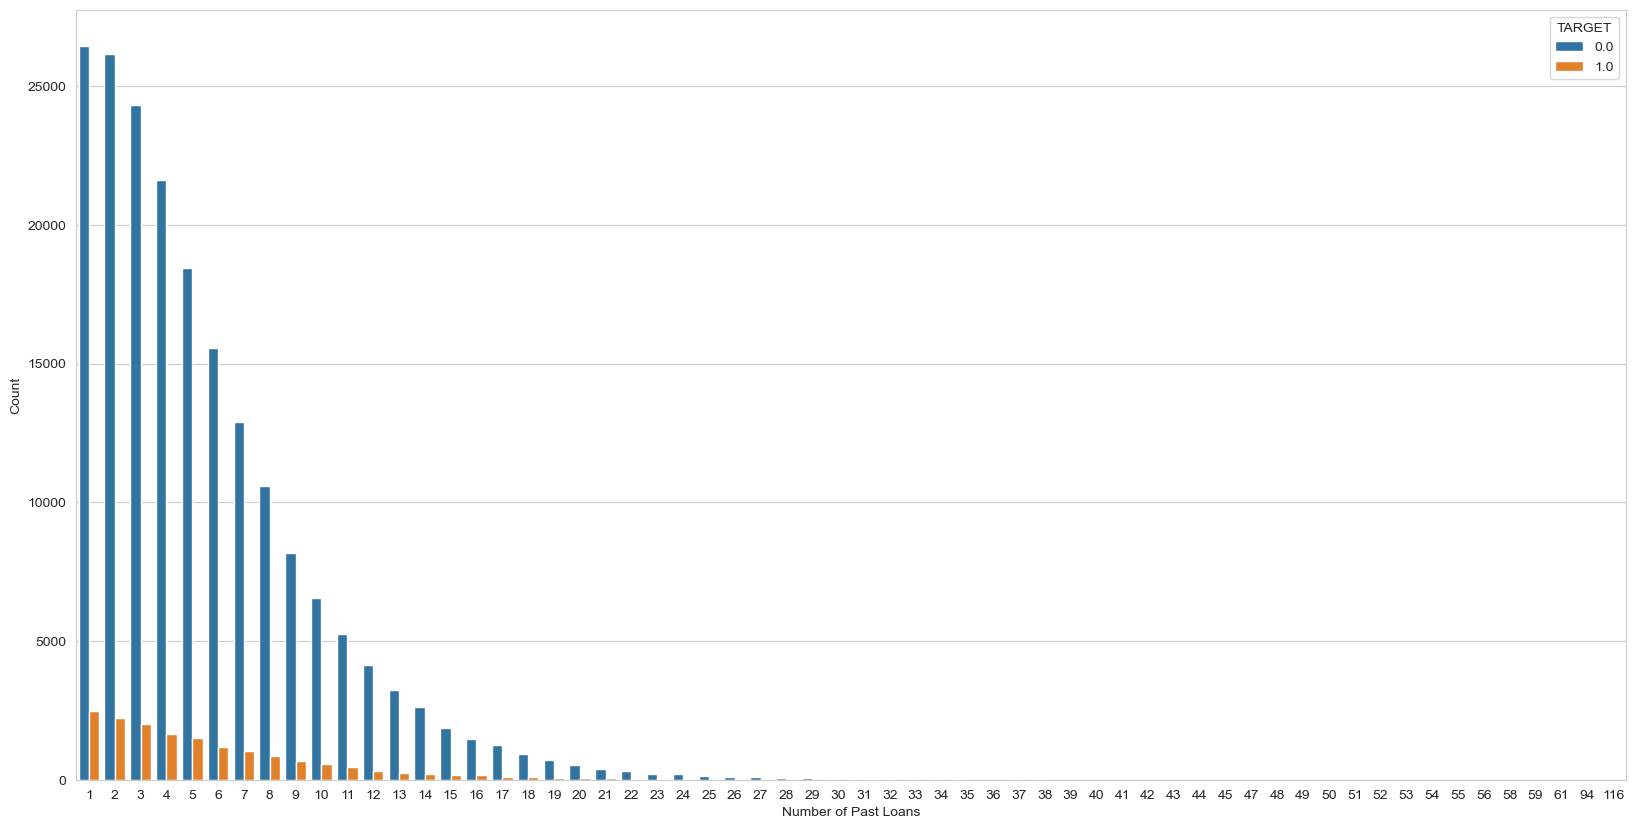

In [207]:
# Create a countplot
plt.figure(figsize=(20, 10))
sns.countplot(x='num_of_past_loans', hue='TARGET', data=num_past_loan_target)

# Set plot labels and title
plt.xlabel('Number of Past Loans')
plt.ylabel('Count')

# Show the plot
plt.show()

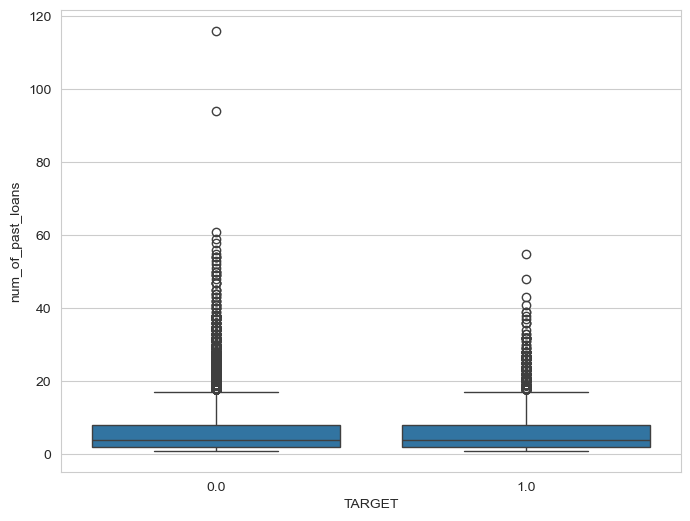

In [208]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='num_of_past_loans', data=num_past_loan_target)
plt.show()

### Phân bố khá giống nhau, có vẻ như biến này không quá ảnh hưởng đến biến TARGET

In [209]:
num_past_loan = df[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')['DAYS_CREDIT'].count().reset_index()
num_past_loan.columns = ['SK_ID_CURR','PAST_LOAN_COUNT']
num_past_loan

,SK_ID_CURR,PAST_LOAN_COUNT
0,0,1
1,1,1
2,2,6
3,3,7
4,4,6
...,...,...
263486,307504,4
263487,307505,2
263488,307506,4
263489,307508,7


### Number of types of past loans per customer

In [210]:
num_of_type_target = merge_table[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0.0,1
1,1,1.0,1
2,2,0.0,1
3,3,0.0,2
4,4,0.0,2
...,...,...,...
210804,307501,0.0,3
210805,307504,0.0,1
210806,307505,0.0,2
210807,307506,0.0,1


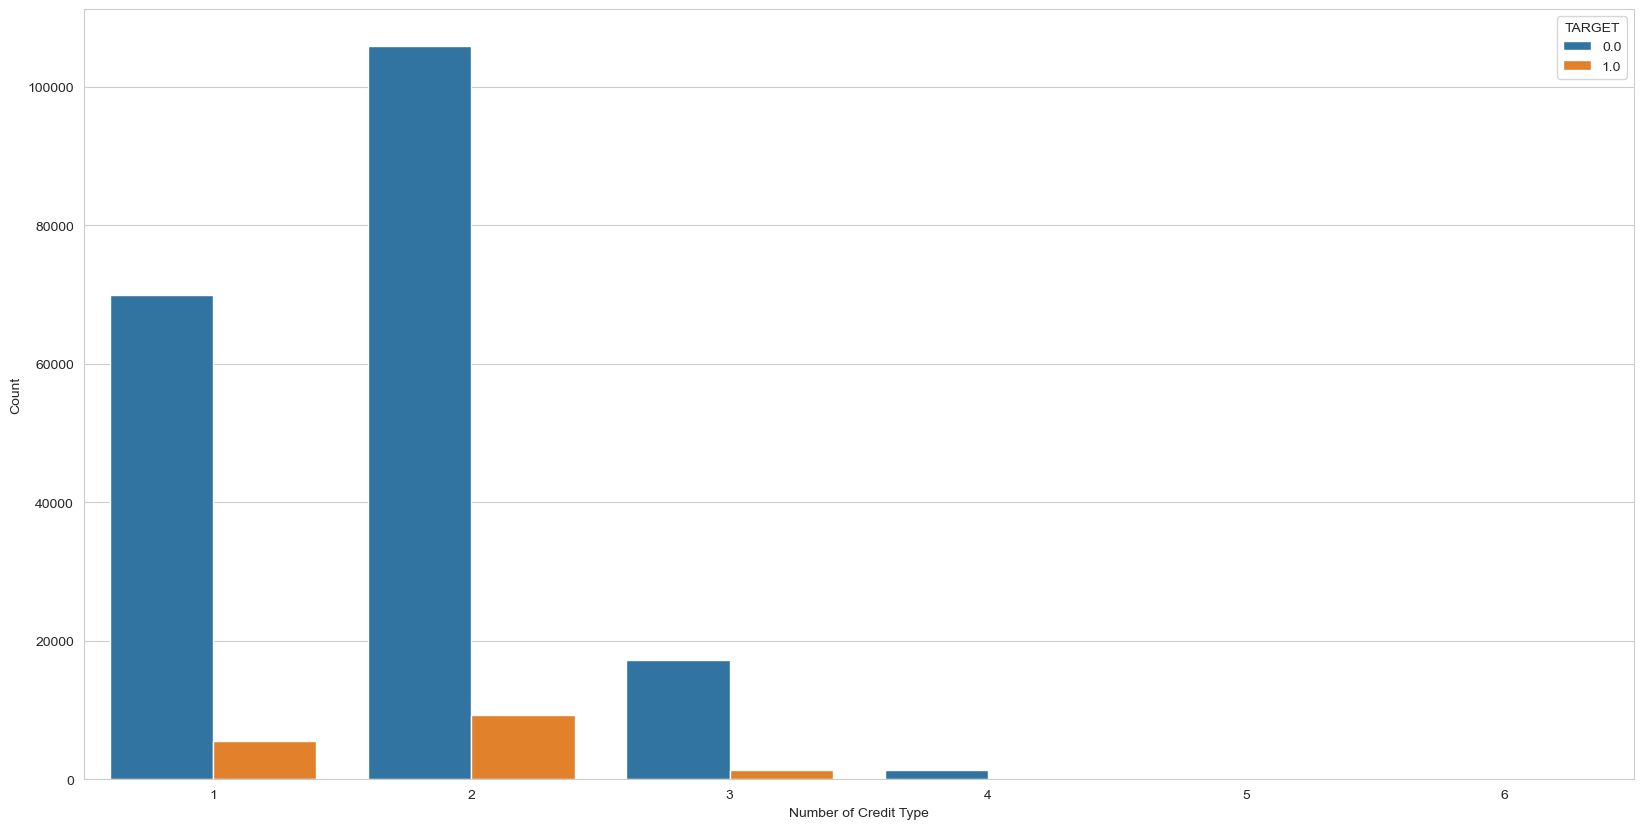

In [211]:
# Create a countplot
plt.figure(figsize=(20, 10))
sns.countplot(x='num_of_credit_type', hue='TARGET', data=num_of_type_target)

# Set plot labels and title
plt.xlabel('Number of Credit Type')
plt.ylabel('Count')

# Show the plot
plt.show()

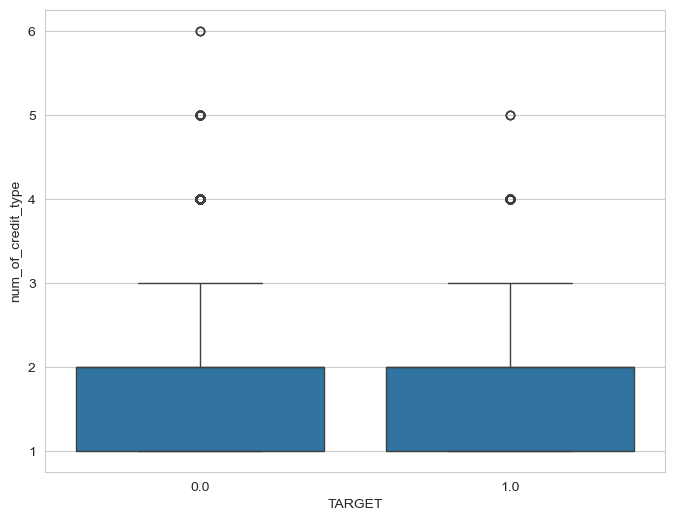

In [212]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='num_of_credit_type', data=num_of_type_target)
plt.show()

### Phân bố khá giống nhau, có vẻ yếu tố number of credit type không ảnh hưởng đến việc khách hàng có gặp khó khăn trong việc trả nợ hay không 

In [213]:
num_of_type = df[['SK_ID_CURR','CREDIT_TYPE']].groupby(['SK_ID_CURR']).nunique().reset_index()
num_of_type.columns = ['SK_ID_CURR','CREDIT_TYPE_COUNT']
num_of_type

,SK_ID_CURR,CREDIT_TYPE_COUNT
0,0,1
1,1,1
2,2,1
3,3,2
4,4,2
...,...,...
263486,307504,1
263487,307505,2
263488,307506,1
263489,307508,3


#### The percentage of active loans per customer

In [214]:
merge_table['CREDIT_ACTIVE_BINARY'] = merge_table['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

merge_table['CREDIT_ACTIVE_BINARY'] = merge_table.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans_target = merge_table.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0.0,100.000000
1,1,1.0,100.000000
2,2,0.0,33.333333
3,3,0.0,42.857143
4,4,0.0,50.000000
...,...,...,...
210804,307501,0.0,20.000000
210805,307504,0.0,25.000000
210806,307505,0.0,100.000000
210807,307506,0.0,0.000000


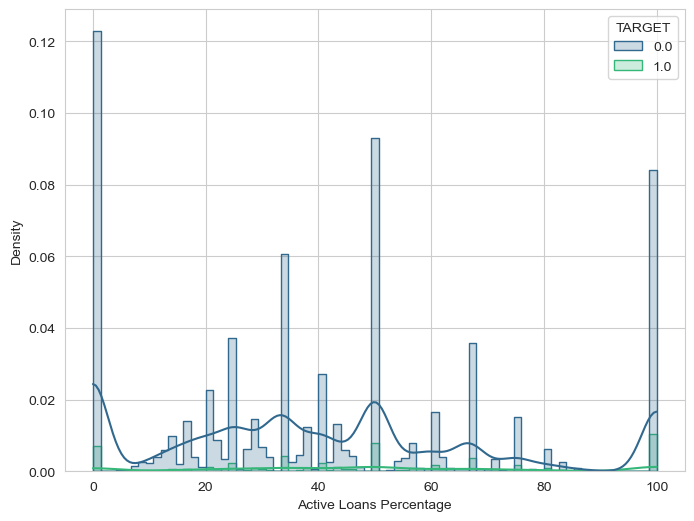

In [215]:
# Create a distplot
plt.figure(figsize=(8, 6))
sns.histplot(data=atv_loans_target, x='ACTIVE_LOANS_PERCENTAGE', hue='TARGET', kde=True, palette='viridis', element='step', stat='density')

# Add labels and title
plt.xlabel('Active Loans Percentage')
plt.ylabel('Density')

# Show the plot
plt.show()

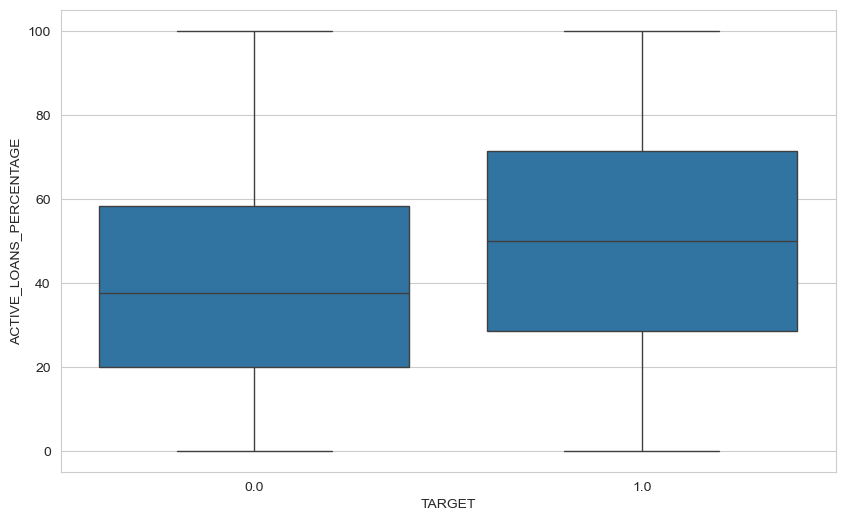

In [216]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='ACTIVE_LOANS_PERCENTAGE', data=atv_loans_target)
plt.show()

In [217]:
df['CREDIT_ACTIVE_BINARY'] = df['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

df['CREDIT_ACTIVE_BINARY'] = df.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)

atv_loans = df.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans['ACTIVE_LOANS_PERCENTAGE'] = atv_loans['ACTIVE_LOANS_PERCENTAGE'] * 100
df = df.drop(columns=['CREDIT_ACTIVE_BINARY'])
atv_loans

,SK_ID_CURR,ACTIVE_LOANS_PERCENTAGE
0,0,100.000000
1,1,100.000000
2,2,33.333333
3,3,42.857143
4,4,50.000000
...,...,...
263486,307504,25.000000
263487,307505,100.000000
263488,307506,0.000000
263489,307508,57.142857


#### The Ratio of Total Debt to Total Credit for each Customer

In [218]:
data_with_sum_debt_pos_sign = merge_table[merge_table['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = merge_table[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

merge_table = merge_table.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
merge_table = merge_table.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


merge_table['DEBT_CREDIT_RATIO'] = (merge_table['TOTAL_CUSTOMER_DEBT']/merge_table['TOTAL_CUSTOMER_CREDIT'])*100
merge_table['DEBT_CREDIT_RATIO'] = merge_table['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del merge_table['TOTAL_CUSTOMER_DEBT'], merge_table['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = merge_table.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0.0,90.706731
1,1,1.0,NaN
2,2,0.0,37.908544
3,3,0.0,41.072109
4,4,0.0,44.445915
...,...,...,...
210804,307501,0.0,74.140954
210805,307504,0.0,13.827518
210806,307505,0.0,NaN
210807,307506,0.0,NaN


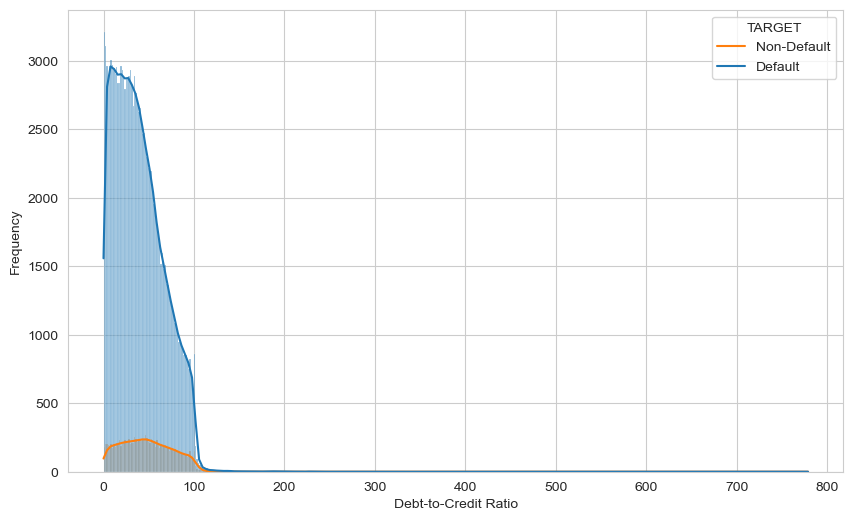

In [219]:
# Create a distplot
plt.figure(figsize=(10, 6))
sns.histplot(debt_credit_target, x='DEBT_CREDIT_RATIO', hue='TARGET', kde=True)
plt.xlabel('Debt-to-Credit Ratio')
plt.ylabel('Frequency')
plt.legend(title='TARGET', labels=['Non-Default', 'Default'])
plt.show()

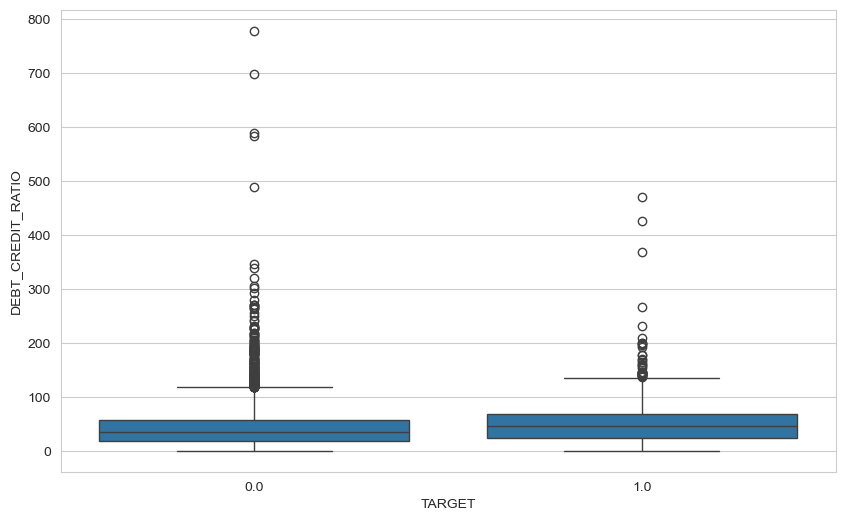

In [220]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='DEBT_CREDIT_RATIO', data=debt_credit_target)
plt.show()

In [221]:
data_with_sum_debt_pos_sign_all = df[df['AMT_CREDIT_SUM_DEBT']>0]

#chỉ consider những khoản debt đã đc trả hoàn toàn.
grp1 = data_with_sum_debt_pos_sign_all[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = df[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

df = df.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
df = df.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


df['DEBT_CREDIT_RATIO'] = (df['TOTAL_CUSTOMER_DEBT']/df['TOTAL_CUSTOMER_CREDIT'])*100
df['DEBT_CREDIT_RATIO'] = df['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del df['TOTAL_CUSTOMER_DEBT'], df['TOTAL_CUSTOMER_CREDIT']

debt_credit = df.groupby(by = ['SK_ID_CURR'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit

,SK_ID_CURR,DEBT_CREDIT_RATIO
0,0,90.706731
1,1,NaN
2,2,37.908544
3,3,41.072109
4,4,44.445915
...,...,...
263486,307504,13.827518
263487,307505,NaN
263488,307506,NaN
263489,307508,4.571994


### A High value may be a red flag indicative of potential default

#### Count Overdue Counts

In [222]:
def overDue(df):
    name_flag = 'OVERDUE_FLAG'
    name = 'OVERDUE'
    
    def fun(x):
        days = abs(x)
        if days > 0:
            return 1
        else:
            return 0

    df[name_flag] = df['CREDIT_DAY_OVERDUE'].apply(fun)
    
    df[name] = df.groupby('SK_ID_CURR')[name_flag].transform('sum')
    
    #lets increase the groups by 1 to make the base group 1
    df[name] = df[name].apply(lambda x:x+1)
    
    #drop column
    df.drop([name_flag],axis=1, inplace=True)

#apply function
overDue(df)

#### Add Features

In [223]:
final_dataset = df.merge(num_past_loan,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(num_of_type,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(atv_loans,
                                      how='left', 
                                      on='SK_ID_CURR')
final_dataset = final_dataset.merge(debt_credit,
                                      how='left', 
                                      on='SK_ID_CURR')

In [224]:
final_dataset

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,DEBT_CREDIT_RATIO_x,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE,DEBT_CREDIT_RATIO_y
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,...,Consumer credit,-131,NaN,254629,4.761731,1,11,3,54.545455,4.761731
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,...,Credit card,-20,NaN,254629,4.761731,1,11,3,54.545455,4.761731
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,...,Consumer credit,-16,NaN,254629,4.761731,1,11,3,54.545455,4.761731
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,...,Credit card,-16,NaN,254629,4.761731,1,11,3,54.545455,4.761731
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,...,Consumer credit,-21,NaN,254629,4.761731,1,11,3,54.545455,4.761731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,45.0,-227.0,NaN,0,450000.0,...,Consumer credit,-31,NaN,66820,NaN,1,1,1,0.000000,NaN
1465321,5054382,Closed,currency 1,-381,0,-199.0,-199.0,0.0,0,19800.0,...,Consumer credit,-199,0.0,166221,NaN,1,1,1,0.000000,NaN
1465322,5043236,Active,currency 1,-1441,0,2197.0,NaN,NaN,0,1800000.0,...,Mortgage,-2,NaN,118290,59.822750,1,1,1,100.000000,59.822750
1465323,5053303,Closed,currency 1,-375,0,-41.0,-19.0,NaN,0,175054.5,...,Consumer credit,-4,17140.5,95296,NaN,1,1,1,0.000000,NaN


In [225]:
final_dataset = final_dataset.drop(columns = ['DEBT_CREDIT_RATIO_y'])

In [226]:
final_dataset = final_dataset.rename(columns = {'DEBT_CREDIT_RATIO_x': 'DEBT_CREDIT_RATIO'})

In [227]:
final_dataset

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,...,0.0,Consumer credit,-131,NaN,254629,4.761731,1,11,3,54.545455
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,...,0.0,Credit card,-20,NaN,254629,4.761731,1,11,3,54.545455
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,...,0.0,Consumer credit,-16,NaN,254629,4.761731,1,11,3,54.545455
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,...,0.0,Credit card,-16,NaN,254629,4.761731,1,11,3,54.545455
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,...,0.0,Consumer credit,-21,NaN,254629,4.761731,1,11,3,54.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,5052629,Closed,currency 1,-532,0,45.0,-227.0,NaN,0,450000.0,...,0.0,Consumer credit,-31,NaN,66820,NaN,1,1,1,0.000000
1465321,5054382,Closed,currency 1,-381,0,-199.0,-199.0,0.0,0,19800.0,...,0.0,Consumer credit,-199,0.0,166221,NaN,1,1,1,0.000000
1465322,5043236,Active,currency 1,-1441,0,2197.0,NaN,NaN,0,1800000.0,...,0.0,Mortgage,-2,NaN,118290,59.822750,1,1,1,100.000000
1465323,5053303,Closed,currency 1,-375,0,-41.0,-19.0,NaN,0,175054.5,...,0.0,Consumer credit,-4,17140.5,95296,NaN,1,1,1,0.000000


#### Merge With Bureau Balance

In [228]:
df3 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau_balance.csv")
df3.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [229]:
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [230]:
# apply formula to create bureau_balance dataframe grouped by SK_ID_BUREAU with mean values of all numerical columns
bureau_bal_mean = extract_mean(df3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\3099452620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_')


In [231]:
bureau_bal_mean.head()

,BUR_BAL_MEAN_SK_ID_BUREAU,BUR_BAL_MEAN_MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [232]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})

In [233]:
final_dataset = final_dataset.merge(bureau_bal_mean,  on = 'SK_ID_BUREAU', how = 'left')
final_dataset.drop('SK_ID_BUREAU', axis = 1, inplace = True) # we don't need this internal ID anymore

In [234]:
final_dataset

,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,DEBT_CREDIT_RATIO,OVERDUE,PAST_LOAN_COUNT,CREDIT_TYPE_COUNT,ACTIVE_LOANS_PERCENTAGE,BUR_BAL_MEAN_MONTHS_BALANCE
0,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,Consumer credit,-131,NaN,254629,4.761731,1,11,3,54.545455,NaN
1,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,Credit card,-20,NaN,254629,4.761731,1,11,3,54.545455,NaN
2,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,Consumer credit,-16,NaN,254629,4.761731,1,11,3,54.545455,NaN
3,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,Credit card,-16,NaN,254629,4.761731,1,11,3,54.545455,NaN
4,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,Consumer credit,-21,NaN,254629,4.761731,1,11,3,54.545455,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,Closed,currency 1,-532,0,45.0,-227.0,NaN,0,450000.0,0.0,...,Consumer credit,-31,NaN,66820,NaN,1,1,1,0.000000,-8.5
1465321,Closed,currency 1,-381,0,-199.0,-199.0,0.0,0,19800.0,0.0,...,Consumer credit,-199,0.0,166221,NaN,1,1,1,0.000000,-6.0
1465322,Active,currency 1,-1441,0,2197.0,NaN,NaN,0,1800000.0,1076809.5,...,Mortgage,-2,NaN,118290,59.822750,1,1,1,100.000000,NaN
1465323,Closed,currency 1,-375,0,-41.0,-19.0,NaN,0,175054.5,NaN,...,Consumer credit,-4,17140.5,95296,NaN,1,1,1,0.000000,-6.0


In [235]:
def extract_mean_bur(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add
    return y

In [236]:
final_data_mean_values = extract_mean_bur(final_dataset)
final_data_mean_values = final_data_mean_values.rename(columns = {'BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\694706870.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add


In [237]:
final_data_mean_values

,SK_ID_CURR,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_CREDIT_DAY_OVERDUE,BUR_MEAN_DAYS_CREDIT_ENDDATE,BUR_MEAN_DAYS_ENDDATE_FACT,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_DAYS_CREDIT_UPDATE,BUR_MEAN_AMT_ANNUITY,BUR_MEAN_DEBT_CREDIT_RATIO,BUR_MEAN_OVERDUE,BUR_MEAN_PAST_LOAN_COUNT,BUR_MEAN_CREDIT_TYPE_COUNT,BUR_MEAN_ACTIVE_LOANS_PERCENTAGE,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,0,-63.000000,0.0,237.000000,NaN,NaN,0.0,8.551350e+04,77566.500000,NaN,0.0,-28.000000,NaN,90.706731,1.0,1.0,1.0,100.000000,NaN
1,1,-2348.000000,0.0,-2044.000000,NaN,11666.385,0.0,2.835000e+04,0.000000,0.0000,0.0,-18.000000,NaN,NaN,1.0,1.0,1.0,100.000000,-50.500000
2,2,-810.333333,0.0,-572.166667,-1014.000000,3771.990,0.0,4.239018e+04,16069.500000,0.0000,0.0,-625.500000,NaN,37.908544,1.0,6.0,1.0,33.333333,NaN
3,3,-1131.428571,0.0,-658.714286,-1394.000000,0.000,0.0,6.913607e+04,28395.642857,0.0000,0.0,-805.000000,NaN,41.072109,1.0,7.0,2.0,42.857143,NaN
4,4,-773.333333,0.0,474.500000,-761.000000,NaN,0.0,4.704240e+05,209084.250000,0.0000,0.0,-63.333333,NaN,44.445915,1.0,6.0,2.0,50.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263486,307504,-1149.750000,0.0,-557.750000,-987.000000,0.000,0.0,2.165383e+05,29941.875000,0.0000,0.0,-742.750000,NaN,13.827518,1.0,4.0,1.0,25.000000,NaN
263487,307505,-461.500000,0.0,5931.500000,NaN,0.000,0.0,1.809000e+06,0.000000,540000.0000,0.0,-12.000000,90463.50000,NaN,1.0,2.0,2.0,100.000000,-7.250000
263488,307506,-1390.500000,0.0,-1115.500000,-1095.250000,NaN,0.0,6.481575e+04,0.000000,0.0000,0.0,-862.500000,NaN,NaN,1.0,4.0,1.0,0.000000,NaN
263489,307508,-765.428571,0.0,587.666667,-318.333333,0.000,0.0,7.866153e+05,41958.000000,300.7875,0.0,-154.571429,6369.06375,4.571994,1.0,7.0,3.0,57.142857,-18.142857


In [238]:
#final_data_mean_values.to_csv('bureau_balance_merge_bureau.csv', index = False)
#print('done')

done
